In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("NSE-TATA.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


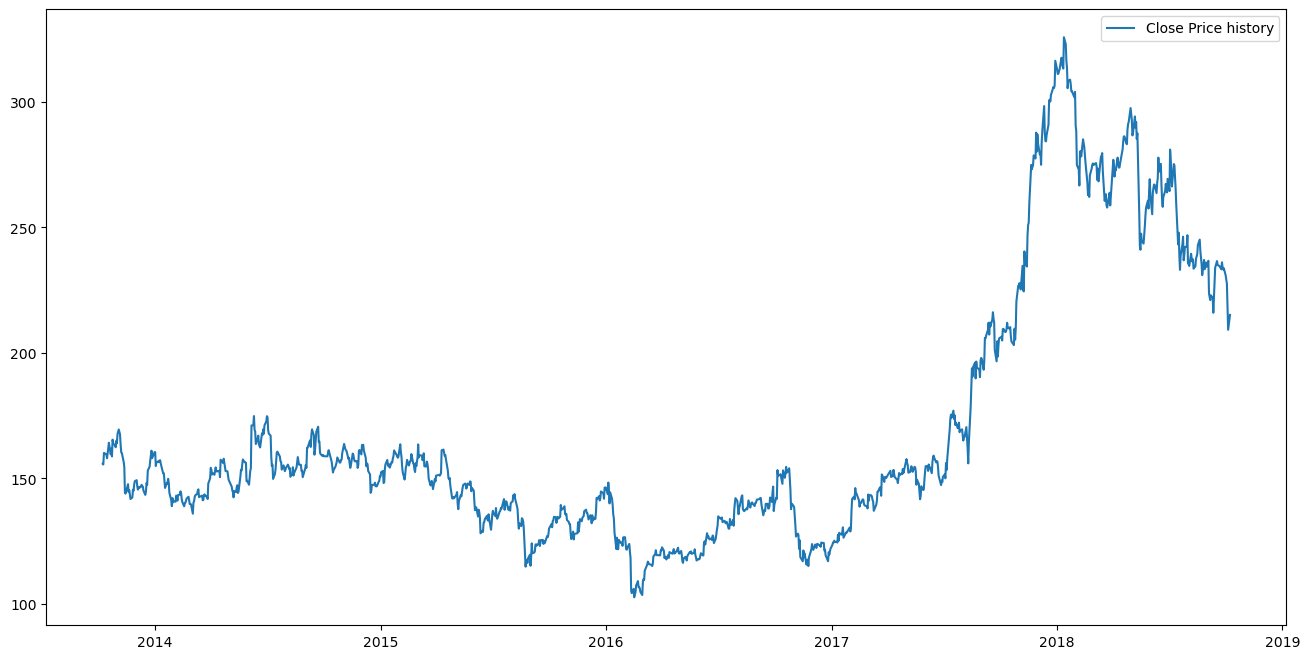

In [5]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')
plt.legend()
plt.show()

In [7]:
# Ensure data is sorted properly
data = df.sort_index(ascending=True).reset_index(drop=True)  # Reset index to ensure numeric indexing

# Create an empty DataFrame
new_dataset = pd.DataFrame(columns=['Date', 'Close'])

# Use `.loc[]` for assignment to avoid ChainedAssignmentError
for i in range(len(data)):
    new_dataset.loc[i, "Date"] = data.loc[i, "Date"]
    new_dataset.loc[i, "Close"] = data.loc[i, "Close"]


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is the original DataFrame with 'Date' and 'Close' columns
df = df.sort_index(ascending=True, axis=0)

# Select only the 'Close' column for scaling
new_dataset = df[['Date', 'Close']].copy()

# Set Date as the index
new_dataset.set_index("Date", inplace=True)

# Convert to NumPy array (only Close column)
final_dataset = new_dataset['Close'].values.reshape(-1, 1).astype(float)

# Split into training and validation datasets
train_data = final_dataset[:987, :]
valid_data = final_dataset[987:, :]

# Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

# Prepare training data
x_train_data, y_train_data = [], []

for i in range(60, len(train_data)):  # Use only training data for input sequences
    x_train_data.append(scaled_data[i-60:i, 0])  # Last 60 days as input
    y_train_data.append(scaled_data[i, 0])      # Target value

# Convert to NumPy arrays
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

# Reshape to fit LSTM input shape: (samples, timesteps, features)
x_train_data = x_train_data.reshape((x_train_data.shape[0], x_train_data.shape[1], 1))

print("Shape of x_train_data:", x_train_data.shape)
print("Shape of y_train_data:", y_train_data.shape)


Shape of x_train_data: (927, 60, 1)
Shape of y_train_data: (927,)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Define the LSTM Model
lstm_model = Sequential()

# First LSTM Layer with 50 units, returning sequences for stacking another LSTM
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))

# Second LSTM Layer
lstm_model.add(LSTM(units=50))

# Fully Connected Output Layer (Dense)
lstm_model.add(Dense(1))

# Select input data for predictions (last 60 days + validation set length)
inputs_data = new_dataset['Close'].iloc[-(len(valid_data) + 60):].values.reshape(-1, 1)

# Apply the same scaler
inputs_data = scaler.transform(inputs_data)

# Compile the Model
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the Model
lstm_model.fit(x_train_data, y_train_data, epochs=50, batch_size=32, verbose=2)


C:\Users\nabin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
29/29 - 6s - 208ms/step - loss: 0.0095
Epoch 2/50
29/29 - 1s - 50ms/step - loss: 0.0012
Epoch 3/50
29/29 - 1s - 40ms/step - loss: 8.7747e-04
Epoch 4/50
29/29 - 1s - 42ms/step - loss: 8.0156e-04
Epoch 5/50
29/29 - 1s - 44ms/step - loss: 7.4607e-04
Epoch 6/50
29/29 - 1s - 51ms/step - loss: 7.1416e-04
Epoch 7/50
29/29 - 1s - 41ms/step - loss: 6.6063e-04
Epoch 8/50
29/29 - 1s - 51ms/step - loss: 6.2525e-04
Epoch 9/50
29/29 - 2s - 58ms/step - loss: 6.3307e-04
Epoch 10/50
29/29 - 3s - 104ms/step - loss: 5.8156e-04
Epoch 11/50
29/29 - 3s - 88ms/step - loss: 5.6659e-04
Epoch 12/50
29/29 - 3s - 96ms/step - loss: 5.2857e-04
Epoch 13/50
29/29 - 1s - 45ms/step - loss: 5.3903e-04
Epoch 14/50
29/29 - 1s - 49ms/step - loss: 5.0376e-04
Epoch 15/50
29/29 - 1s - 43ms/step - loss: 4.8438e-04
Epoch 16/50
29/29 - 1s - 37ms/step - loss: 4.8602e-04
Epoch 17/50
29/29 - 1s - 49ms/step - loss: 4.4501e-04
Epoch 18/50
29/29 - 1s - 48ms/step - loss: 4.4361e-04
Epoch 19/50
29/29 - 3s - 94ms/step - loss: 

In [13]:
lstm_model.save("my_model.keras") 

Type of train_data: <class 'pandas.core.frame.DataFrame'>
train_data shape: (100, 1)
       Close
0  37.454012
1  95.071431
2  73.199394
3  59.865848
4  15.601864
valid_data shape: (30, 2)
predicted_closing_price shape: (30,)


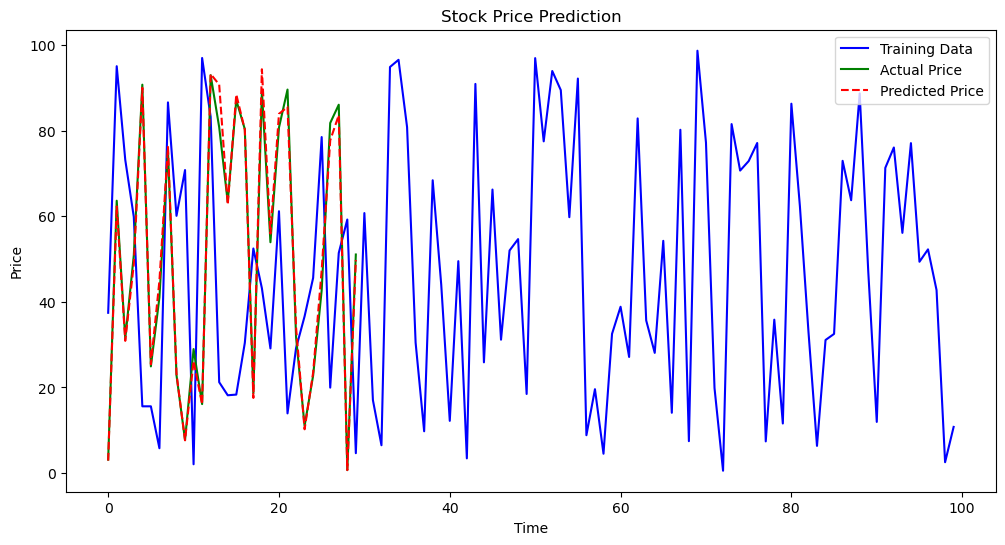

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dummy data for demonstration
np.random.seed(42)
train_data = np.random.rand(100, 1) * 100  # Simulated training data
valid_data = np.random.rand(30, 1) * 100   # Simulated validation data

# Ensure train_data is a DataFrame
if isinstance(train_data, np.ndarray):
    train_data = pd.DataFrame(train_data, columns=["Close"])

# Debugging: Print type and shape
print(f"Type of train_data: {type(train_data)}")
print(f"train_data shape: {train_data.shape}")
print(train_data.head())  # Check if 'Close' exists

# Ensure valid_data is a DataFrame
if isinstance(valid_data, np.ndarray):
    valid_data = pd.DataFrame(valid_data, columns=["Close"])

# Simulating predictions (Replace with actual model predictions)
predicted_closing_price = valid_data["Close"] * (1 + np.random.randn(len(valid_data)) * 0.05)

# Ensure valid_data matches predicted_closing_price length
valid_data = valid_data.tail(len(predicted_closing_price)).copy()
valid_data["Predictions"] = predicted_closing_price

# Debugging: Print shapes
print(f"valid_data shape: {valid_data.shape}")
print(f"predicted_closing_price shape: {predicted_closing_price.shape}")

# Plot results safely
plt.figure(figsize=(12, 6))

# Use the correct indexing based on type
if isinstance(train_data, pd.DataFrame) and "Close" in train_data.columns:
    plt.plot(train_data["Close"], label="Training Data", color="blue")
elif isinstance(train_data, np.ndarray):
    plt.plot(train_data[:, 0], label="Training Data", color="blue")

plt.plot(valid_data["Close"], label="Actual Price", color="green")
plt.plot(valid_data["Predictions"], label="Predicted Price", linestyle="dashed", color="red")

plt.legend()
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


In [19]:
!pip3 install dash
!pip3 install dash-html-components
!pip3 install dash-core-components

In [20]:
pip install --upgrade dash


   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ------- -------------------------------- 1.6/7.9 MB 8.4 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/7.9 MB 8.7 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/7.9 MB 8.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/7.9 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: dash
    Found existing installation: dash 3.0.1
    Uninstalling dash-3.0.1:
      Successfully uninstalled dash-3.0.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!python stock_app.py


In [ ]:
http://127.0.0.1:8050/
